<a href="https://colab.research.google.com/github/pallavi64426/codsoft_ai/blob/main/face_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab import files
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


--2023-10-09 10:17:26--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.009s  

2023-10-09 10:17:26 (102 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
def upload_and_read_file():
    # makes the user to choose a file from the folders on their device
    uploaded = files.upload()

    # checking if there is no file uploaded
    if len(uploaded) == 0:
        return None

    # get the file name from a dict
    file_name = list(uploaded.keys())[0]

    # reading the file
    with open(file_name, 'rb') as file:
        file_content = file.read()

    return file_name, file_content

In [ ]:
def face_detection_recognition():
  file_info = upload_and_read_file()
  file_name, file_content = file_info
  extension = file_name.split(".")

  # check if the file uploaded is an image or video
  if "mp4" in extension[-1].lower():
    detection_video(file_name)
  elif "jpg" in extension[-1].lower() or "jpeg" in extension[-1].lower() or "png" in extension[-1].lower():
    detection_image(file_name)
  else:
    print("File extention error")

In [ ]:
def detection_video(file_name):
  #Import the video and make error handling
  cap = cv2.VideoCapture(file_name)

  #Function "isOpened" is a boolean function which check if the video opened or not and returns true of false
  if (cap.isOpened()== False):
    print("Error opening video")

  count = 0
  #Analyse the video into frames
  while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
      #Make a counter to count all the frames
      count += 1
      pic_name = f"Frame_{count}.jpg"
      #Save the imported frames
      cv2.imwrite(pic_name, frame)
    else:
      break

  for i in range(count):
    image = cv2.imread(f"Frame_{count}.jpg")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = face_detector.detectMultiScale(gray, 1.3, 5)
    crop_count = 0
    for (x,y,w,h) in rects:
      # Define the label text and position
      label_text = f"face_{crop_count+1}"
      label_position = (x, y - 10)  # Adjust the position for the label just above the rectangle
 # Define the font settings
      font = cv2.FONT_HERSHEY_SIMPLEX
      font_scale = 1
      font_color = (255, 255, 255)  # White color
      font_thickness = 3

      # Add the label text to the image
      cv2.putText(image, label_text, label_position, font, font_scale, font_color, font_thickness)
      # Making a box around the detected face
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
      # Cropping the detected face ans save it
      crop = image[y:y+h , x:x+w]
      crop_count += 1
      crop_name = f"Crop_{crop_count}.jpg"
      cv2.imwrite(crop_name, crop)

      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    print(f"This photo have {len(rects)} face")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Face Detection")
    plt.axis('off')
    plt.show()
    print("=======================")

In [ ]:
def detection_image(file_name):
  image = cv2.imread(file_name)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = face_detector.detectMultiScale(gray, 1.3, 5)
  crop_count = 0
  for (x,y,w,h) in rects:
    # Define the label text and position
    label_text = f"face_{crop_count+1}"
    label_position = (x, y - 10)  # Adjust the position for the label just above the rectangle

    # Define the font settings
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_color = (255, 255, 255)  # White color
    font_thickness = 3

    # Add the label text to the image
    cv2.putText(image, label_text, label_position, font, font_scale, font_color, font_thickness)
    # Making a box around the detected face
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    # Cropping the detected face ans save it
    crop = image[y:y+h , x:x+w]
    crop_count += 1
    crop_name = f"Crop_{crop_count}.jpg"
    cv2.imwrite(crop_name, crop)

  print(f"This photo have {len(rects)} face(s)")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Face Detection")
  plt.axis('off')
  plt.show()
  face_crops_recoginiton(len(rects))

In [ ]:
!pip install deepface
from deepface import DeepFace


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=5a4442477b73f7d4563a9db0983d21ca37624bf25a9fc5ab7ff05c20cb8e3ecb
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
def face_crops_recoginiton(crop_count):
  if crop_count == 0:
    print("There is no faces in the image to compare the similarities between them")
  elif crop_count == 1:
    print("There is one face only, Comparison undefined")
  else:
    for i in range(crop_count):
      for j in range(i+1, crop_count):
        result = DeepFace.verify(img1_path = f"Crop_{i+1}.jpg",
              img2_path = f"Crop_{j+1}.jpg",
              model_name = "Facenet")
        similarity = (1- result["distance"]) * 100
        print(f"The similarity between face {i+1} and face {j+1} is {similarity:.2f}")




Saving IMG_20201010_195856.jpg to IMG_20201010_195856.jpg
This photo have 6 face(s)


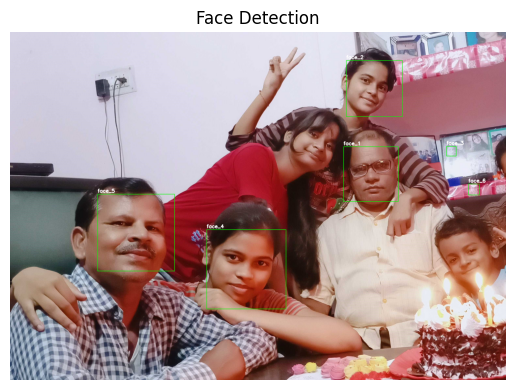

The similarity between face 1 and face 2 is 9.41
The similarity between face 1 and face 3 is 29.53
The similarity between face 1 and face 4 is -0.57


ValueError: ignored

In [11]:
face_detection_recognition()